0. Reinladen
1. Daten in Format, das gut manipuliert werden kann
2. .info, .head (Was sind Zielatztribute und Eigenschaften)
3. Trainings-, Testdatensatz
4. Korrelation
5. Daten bereinigen (Ersetzen, Entfernen, Skalieren)
6. Modelle trainieren
7. Vgl. Modelle (Kreutvalidierung, Mittelwert, Standartabweichung)
8. Bestes Modell optimieren (Parameteroptimisierung; ACHTUNG: Over- / Underfitting?)
9. ggf.  Ensemblemethoden?7
10. Evaluieren mit Testdatensatz (Genauigkeit, Konfusionsmatrix, etc.)

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd 

### **Daten laden**

In [1]:
with open("dataset.csv", "r+") as fobj:
    inhalt = fobj.read()
    inhalt = inhalt.replace(",", ".")
    fobj.seek(0)
    fobj.truncate(0)
    fobj.write(inhalt)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [4]:
data = pd.read_csv('dataset.csv', delimiter=';', skiprows=3)

### **Überblick verschaffen**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Subject           2856 non-null   float64
 1   Hold .            2856 non-null   float64
 2   Hold t            2856 non-null   float64
 3   Hold i            2856 non-null   float64
 4   Hold e            2856 non-null   float64
 5   Hold Shift        2856 non-null   float64
 6   Hold 5            2856 non-null   float64
 7   Hold Shift.1      2856 non-null   float64
 8   Hold Caps         2856 non-null   float64
 9   Hold r            2856 non-null   float64
 10  Hold o            2856 non-null   float64
 11  Hold a            2856 non-null   float64
 12  Hold n            2856 non-null   float64
 13  Hold l            2856 non-null   float64
 14  Hold Enter        2856 non-null   float64
 15  DD ..t            2856 non-null   float64
 16  DD t.i            2856 non-null   float64


In [6]:
data.head()

Subject  Hold .  Hold t  Hold i  Hold e  Hold Shift  Hold 5  Hold Shift.1  \
0      1.0    89.0    92.0    64.0    85.0       123.0    82.0          70.0   
1      1.0    90.0    88.0    99.0    83.0       123.0   101.0          81.0   
2      1.0    87.0    90.0    83.0    65.0        79.0    73.0          96.0   
3      1.0    71.0    81.0    62.0    72.0        83.0    94.0          89.0   
4      1.0    89.0    72.0    82.0    82.0        62.0    89.0          68.0   

   Hold Caps  Hold r  ...  Size Caps    Size r    Size o    Size a    Size n  \
0      101.0    84.0  ...   0.225806  0.225806  0.322581  0.290323  0.225806   
1       94.0    88.0  ...   0.225806  0.225806  0.322581  0.322581  0.258065   
2       62.0    64.0  ...   0.225806  0.193548  0.290323  0.322581  0.225806   
3      104.0    73.0  ...   0.225806  0.225806  0.258065  0.290323  0.225806   
4       88.0    69.0  ...   0.290323  0.225806  0.322581  0.258065  0.225806   

     Size l  Size Enter          AvH          AvP          AvA  
0  0.354839    0.258065  88.07142857  0.190971438  0.288018425  
1  0.387097    0.322581  92.07142857  0.186514294   0.27419354  
2  0.258065    0.225806  83.57142857  0.186171434  0.271889393  
3  0.322581    0.322581  81.42857143  0.177942863  0.278801835  
4  0.290323    0.387097  77.42857143  0.163200007   0.28341013  

[5 rows x 72 columns]

Da der Datensatz einige Leerzeilen enthält, müssen diese zuerst entfernt werden

In [7]:
data = data.dropna(axis='rows')

In [8]:
data1 = data.replace(",",".")
data1.head()

Subject  Hold .  Hold t  Hold i  Hold e  Hold Shift  Hold 5  Hold Shift.1  \
0      1.0    89.0    92.0    64.0    85.0       123.0    82.0          70.0   
1      1.0    90.0    88.0    99.0    83.0       123.0   101.0          81.0   
2      1.0    87.0    90.0    83.0    65.0        79.0    73.0          96.0   
3      1.0    71.0    81.0    62.0    72.0        83.0    94.0          89.0   
4      1.0    89.0    72.0    82.0    82.0        62.0    89.0          68.0   

   Hold Caps  Hold r  ...  Size Caps    Size r    Size o    Size a    Size n  \
0      101.0    84.0  ...   0.225806  0.225806  0.322581  0.290323  0.225806   
1       94.0    88.0  ...   0.225806  0.225806  0.322581  0.322581  0.258065   
2       62.0    64.0  ...   0.225806  0.193548  0.290323  0.322581  0.225806   
3      104.0    73.0  ...   0.225806  0.225806  0.258065  0.290323  0.225806   
4       88.0    69.0  ...   0.290323  0.225806  0.322581  0.258065  0.225806   

     Size l  Size Enter          AvH          AvP          AvA  
0  0.354839    0.258065  88.07142857  0.190971438  0.288018425  
1  0.387097    0.322581  92.07142857  0.186514294   0.27419354  
2  0.258065    0.225806  83.57142857  0.186171434  0.271889393  
3  0.322581    0.322581  81.42857143  0.177942863  0.278801835  
4  0.290323    0.387097  77.42857143  0.163200007   0.28341013  

[5 rows x 72 columns]

### **Daten in x & y aufteilen**

In [9]:
y_data = data['Subject']
x_data = data.drop('Subject', axis='columns')

### **Daten skalieren**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_data) 
x_scal = scaler.transform(x_data)

### **In Test- und Trainingsset aufteilen**

Im beigefügten Paper wurden die Daten in Test-, Trainigs- und Validationsset also 90%-5%-5% eingeteilt. 
Für den ersten Durchlauf aller Module wählen wir daher die gleich Aufteilung

In [11]:
from sklearn.model_selection import train_test_split

train_ratio = 0.9
validation_ratio = 0.05
test_ratio = 0.05

x_train, x_test, y_train, y_test = train_test_split(x_scal, y_data, test_size=1 - train_ratio, shuffle = True, random_state = 42)
#Testset jetzt 90% des gesamten Datensatzes

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, shuffle = True, random_state = 42) 
#Validationset jetzt 50% des Testsets --> Testset 5% des gesamten Datensatzes

print(x_train.shape, x_val.shape, x_test.shape)

(2570, 71) (143, 71) (143, 71)


### **Korrelation**

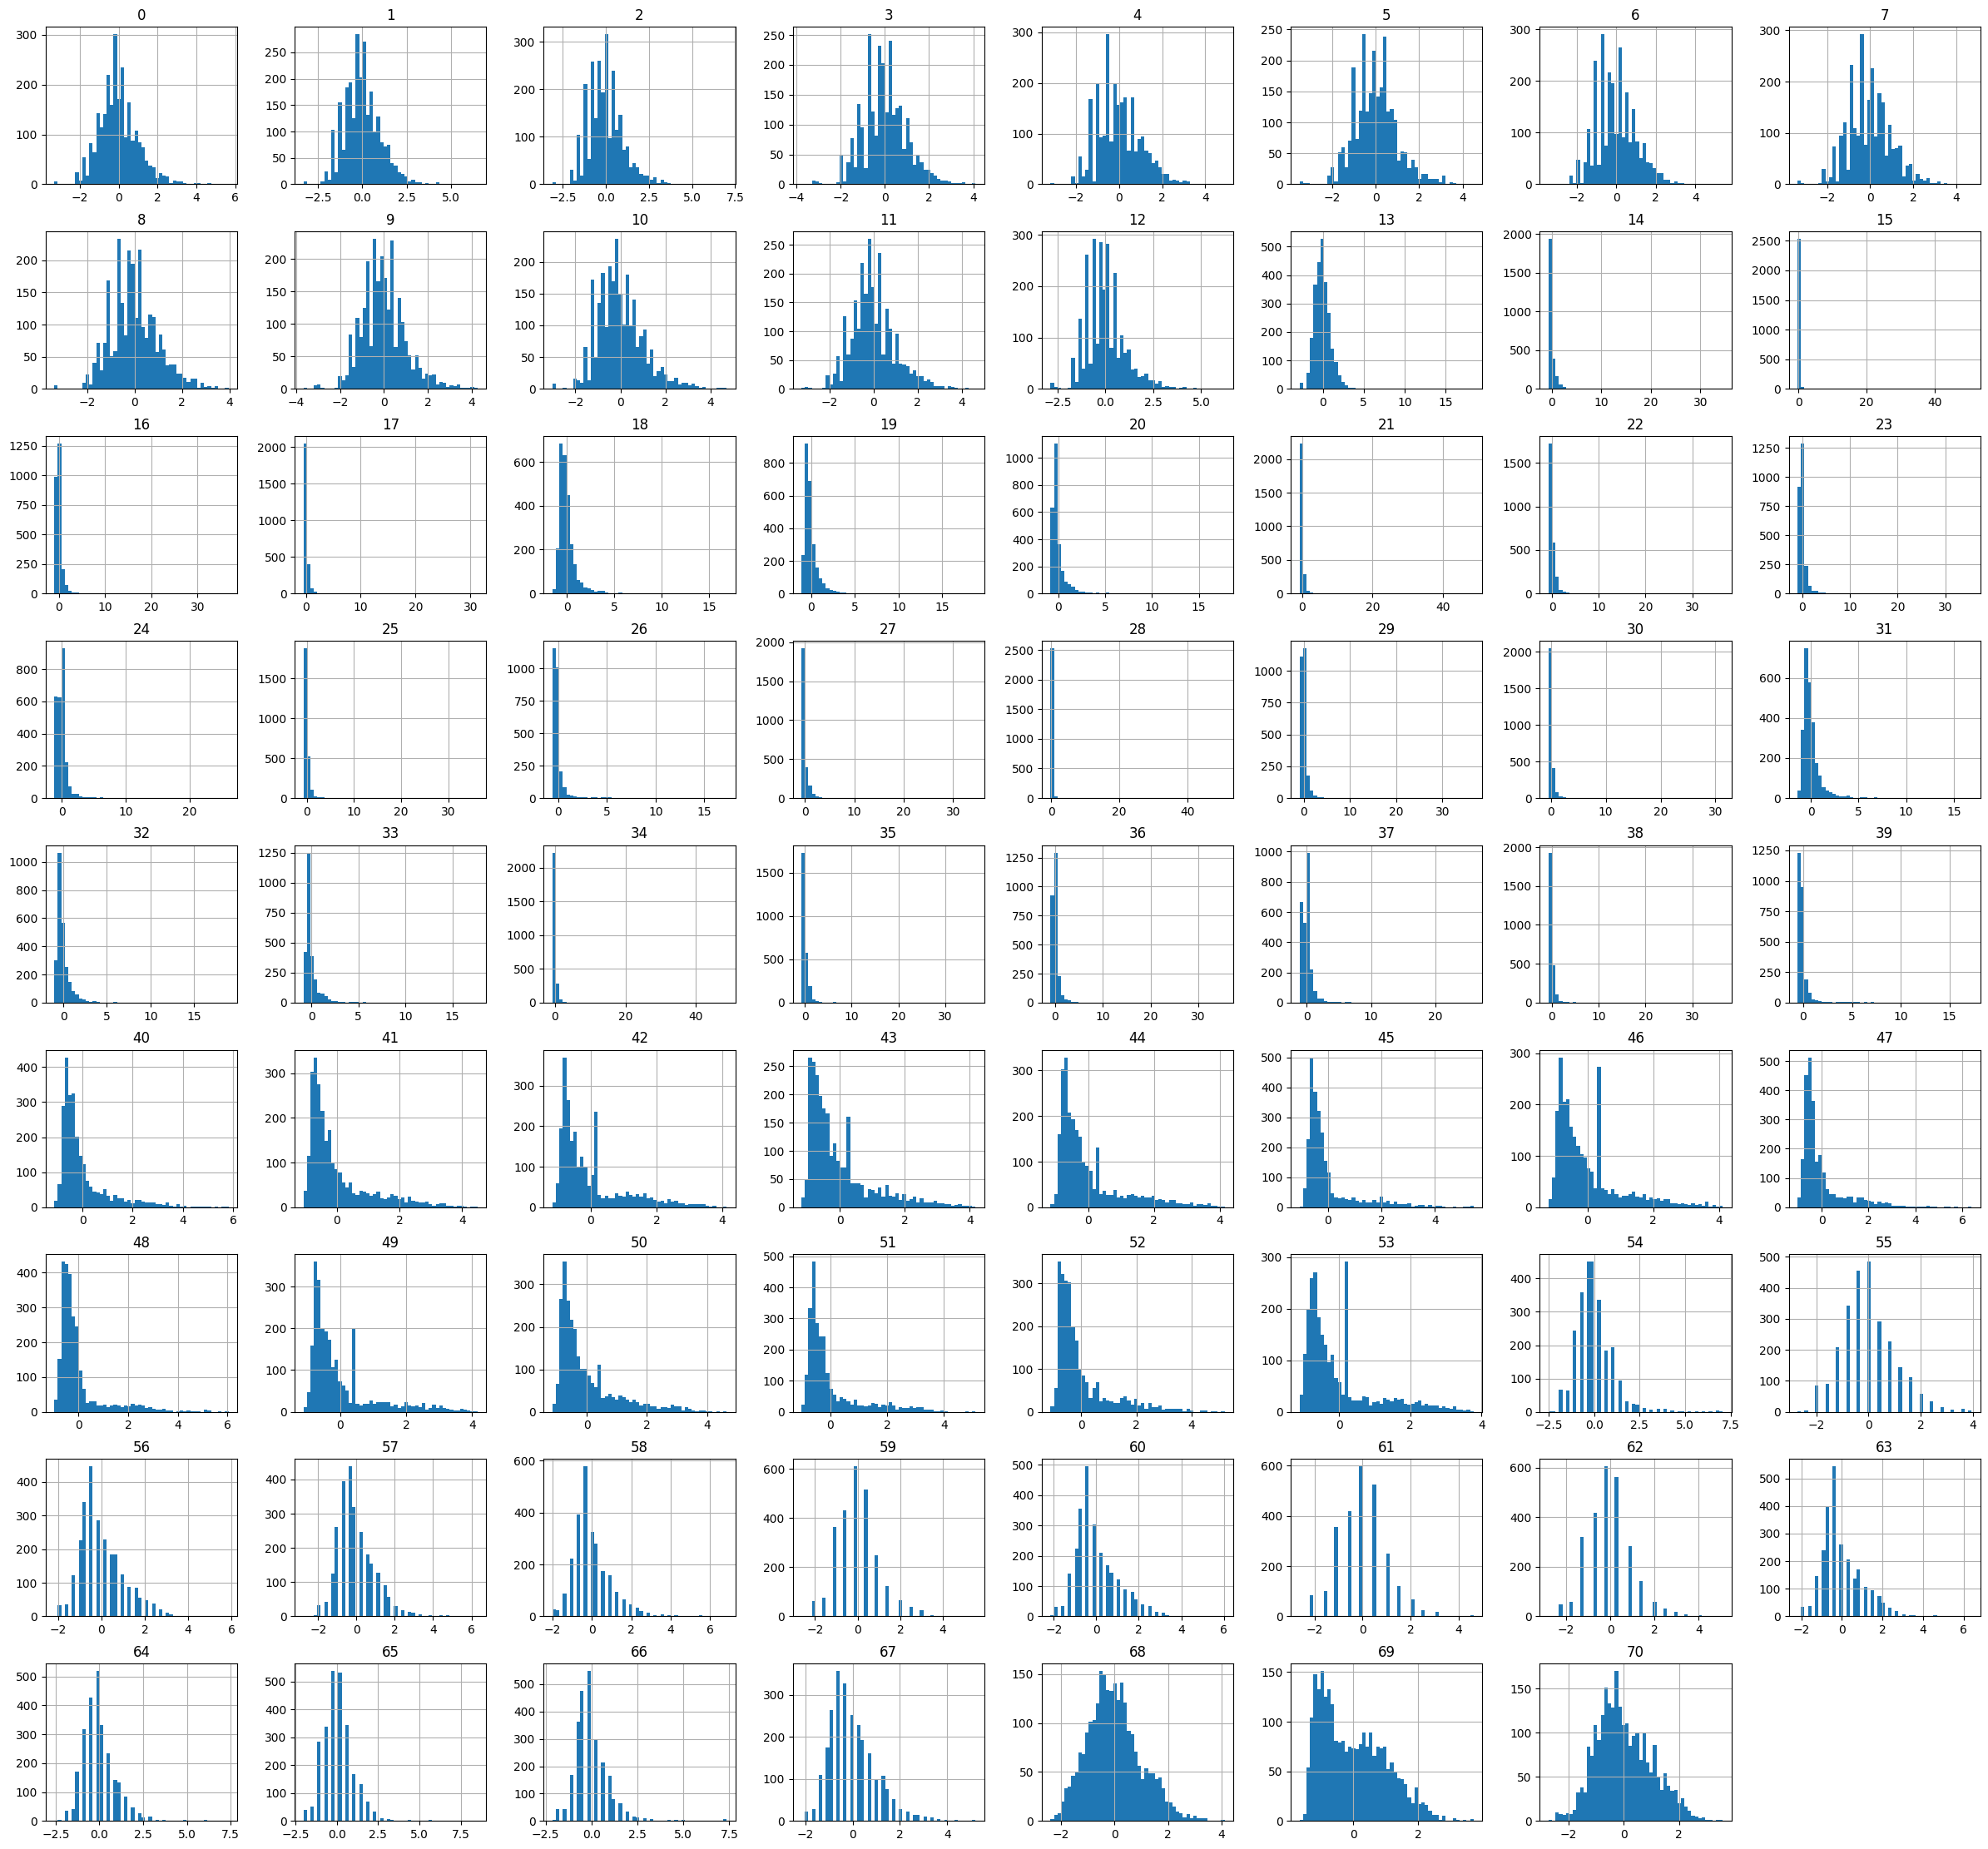

In [12]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame.from_records(x_train)
df.hist(bins=50, figsize=(30, 28))
plt.show()

In [13]:
with open ('corrolation.csv', 'w', newline='') as file:
    file.write(df.corr().to_string())

#Da die Korrelationsmatrix so groß ist, dass sie in VSCode nicht vernünftig abbildbar ist, wurde sie iner extra .txt Datei gespeichert

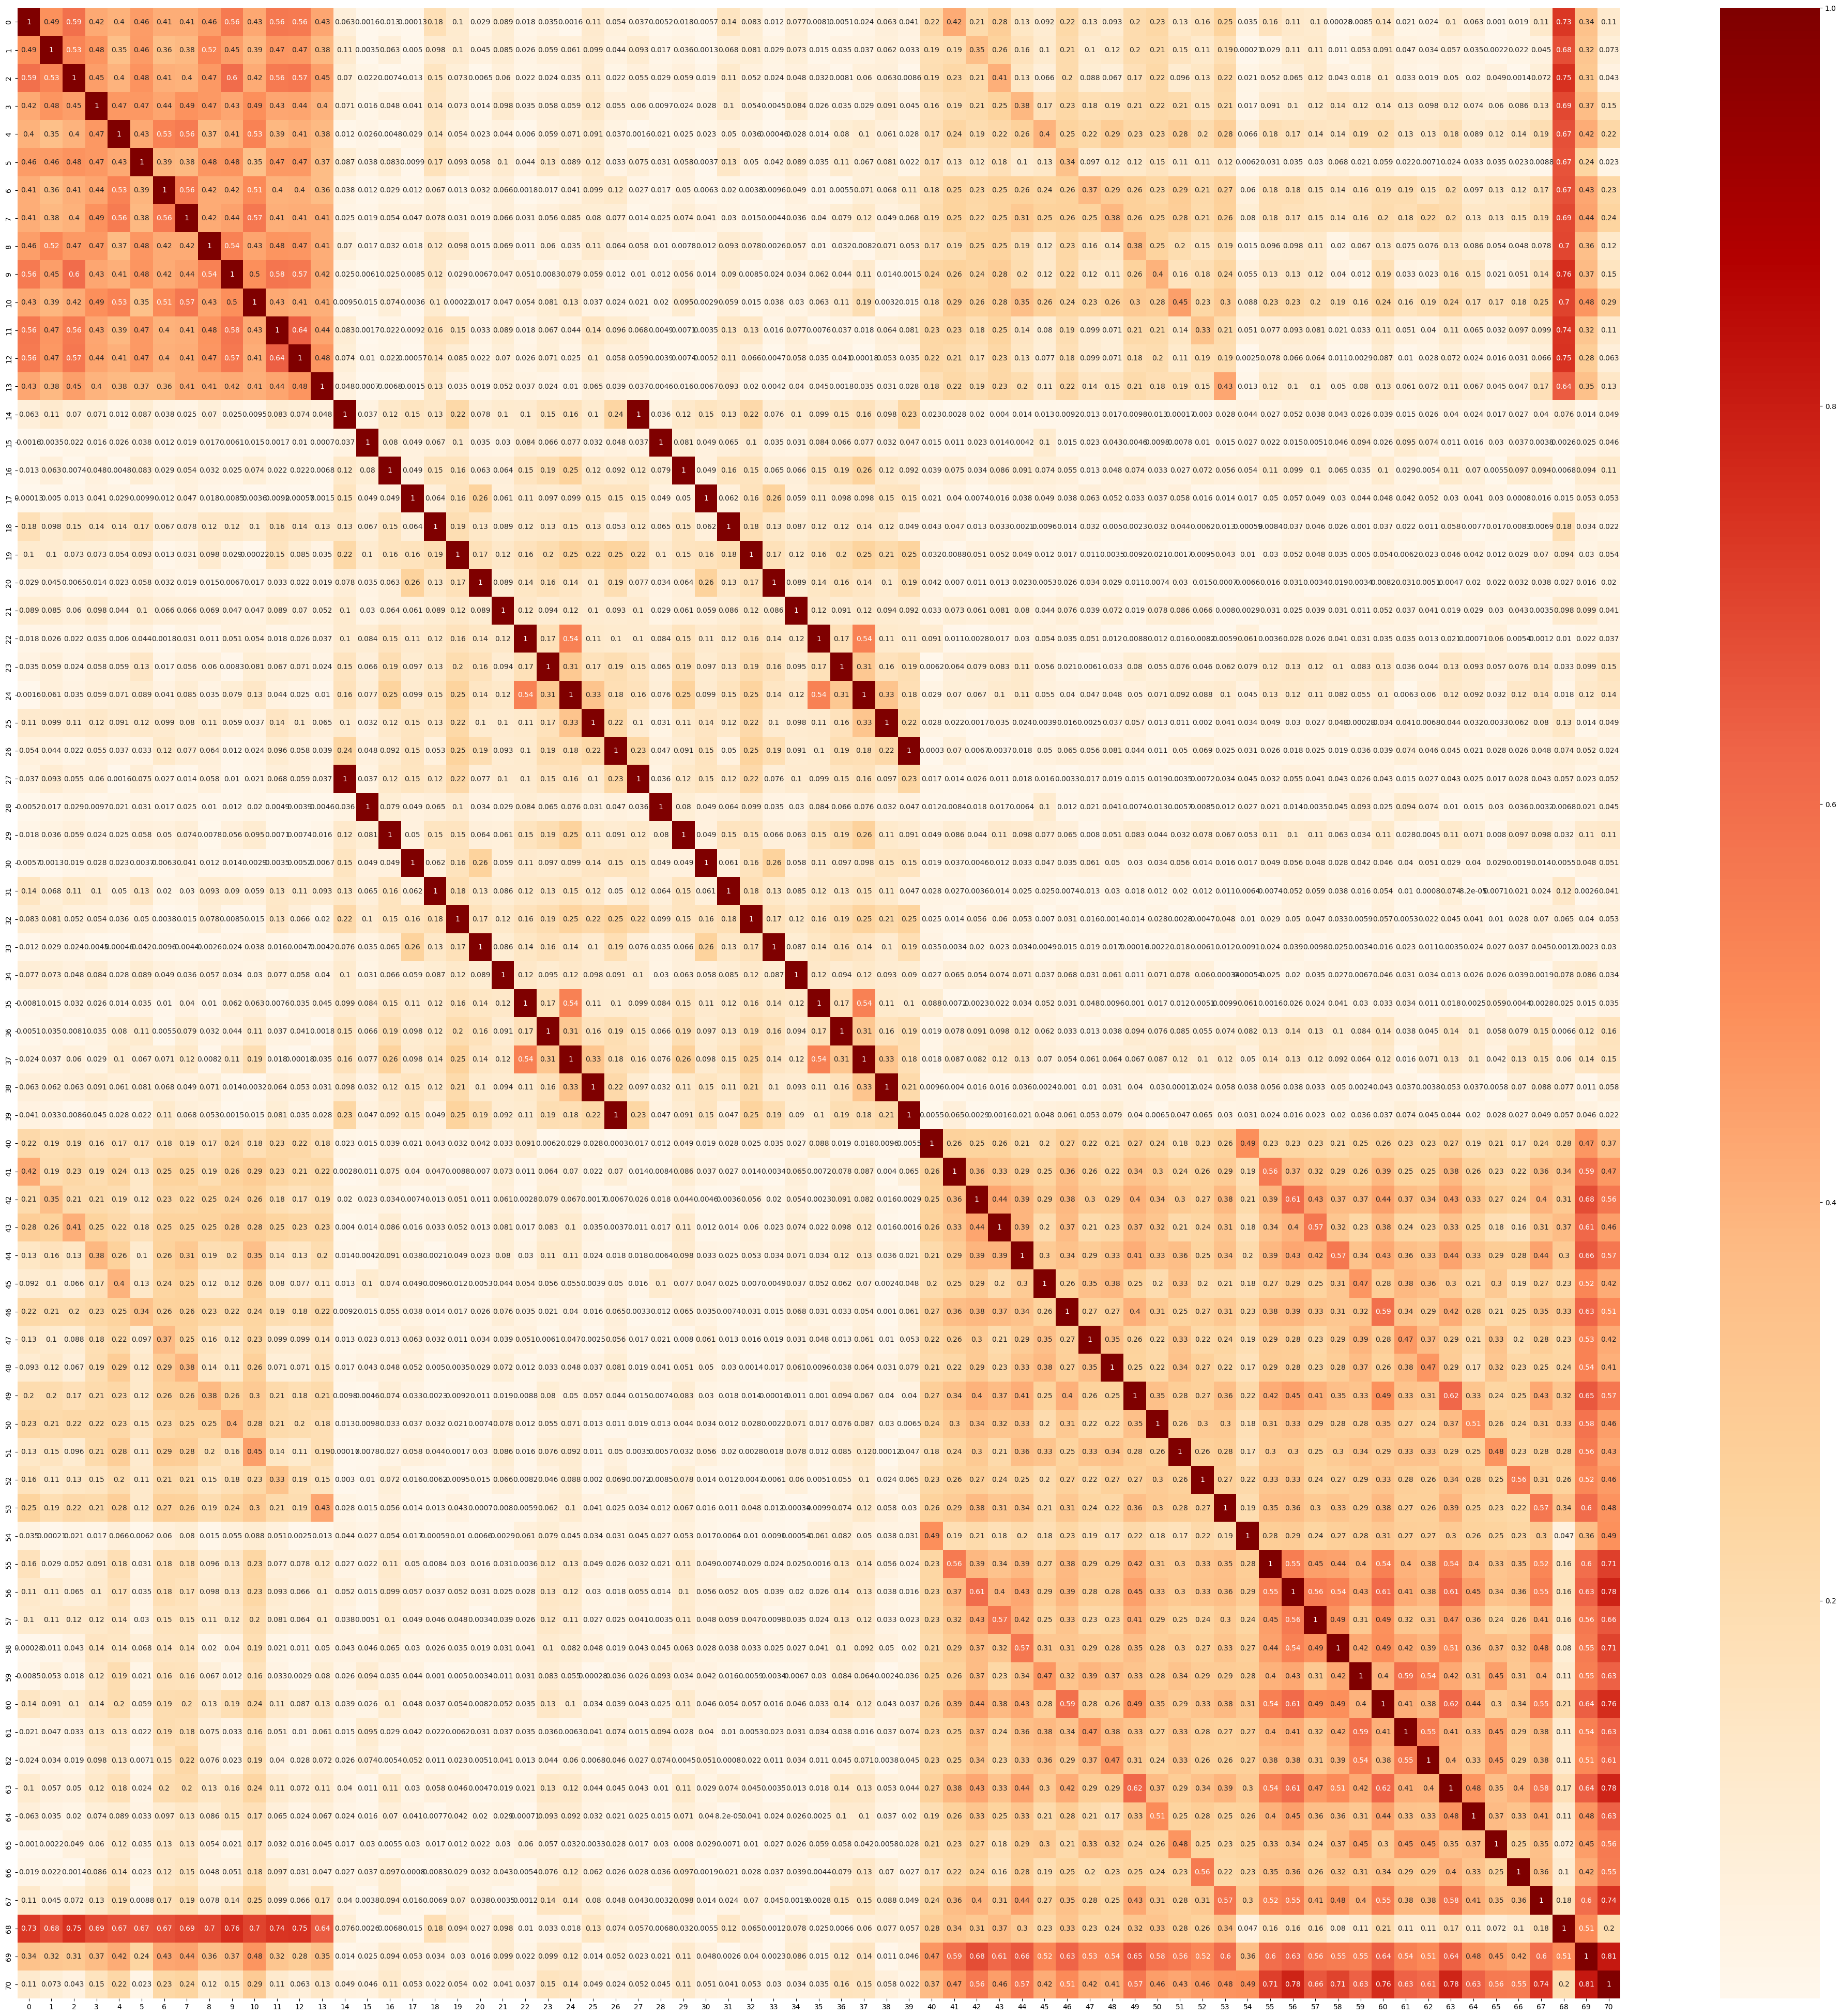

In [14]:
# https://stackoverflow.com/questions/57043260/how-change-the-color-of-boxes-in-confusion-matrix-using-sklearn
# Link für ein Programm, das möglicherweise geeignet ist, die Korrelationsmatrix schön darzustellen

import seaborn as sn
df_cm = pd.DataFrame(df.corr(), index = [i for i in np.arange(0,71)], columns = [i for i in np.arange(0,71)])
plt.figure(figsize = (50,50))
sn.heatmap(abs(df_cm), annot = True, cmap = "OrRd")
plt.savefig("Korrelation_1")

Man sieht, dass die Werte 14-26 (Down-Down) mit den Werten 27-39 (Up-Down) stark korrelieren, da Up-Down schon in Down-Down enthalten ist. Wir droppen also die Up-Down-Werte aus unserem Dataset (über 35.000 Werte "gespart").

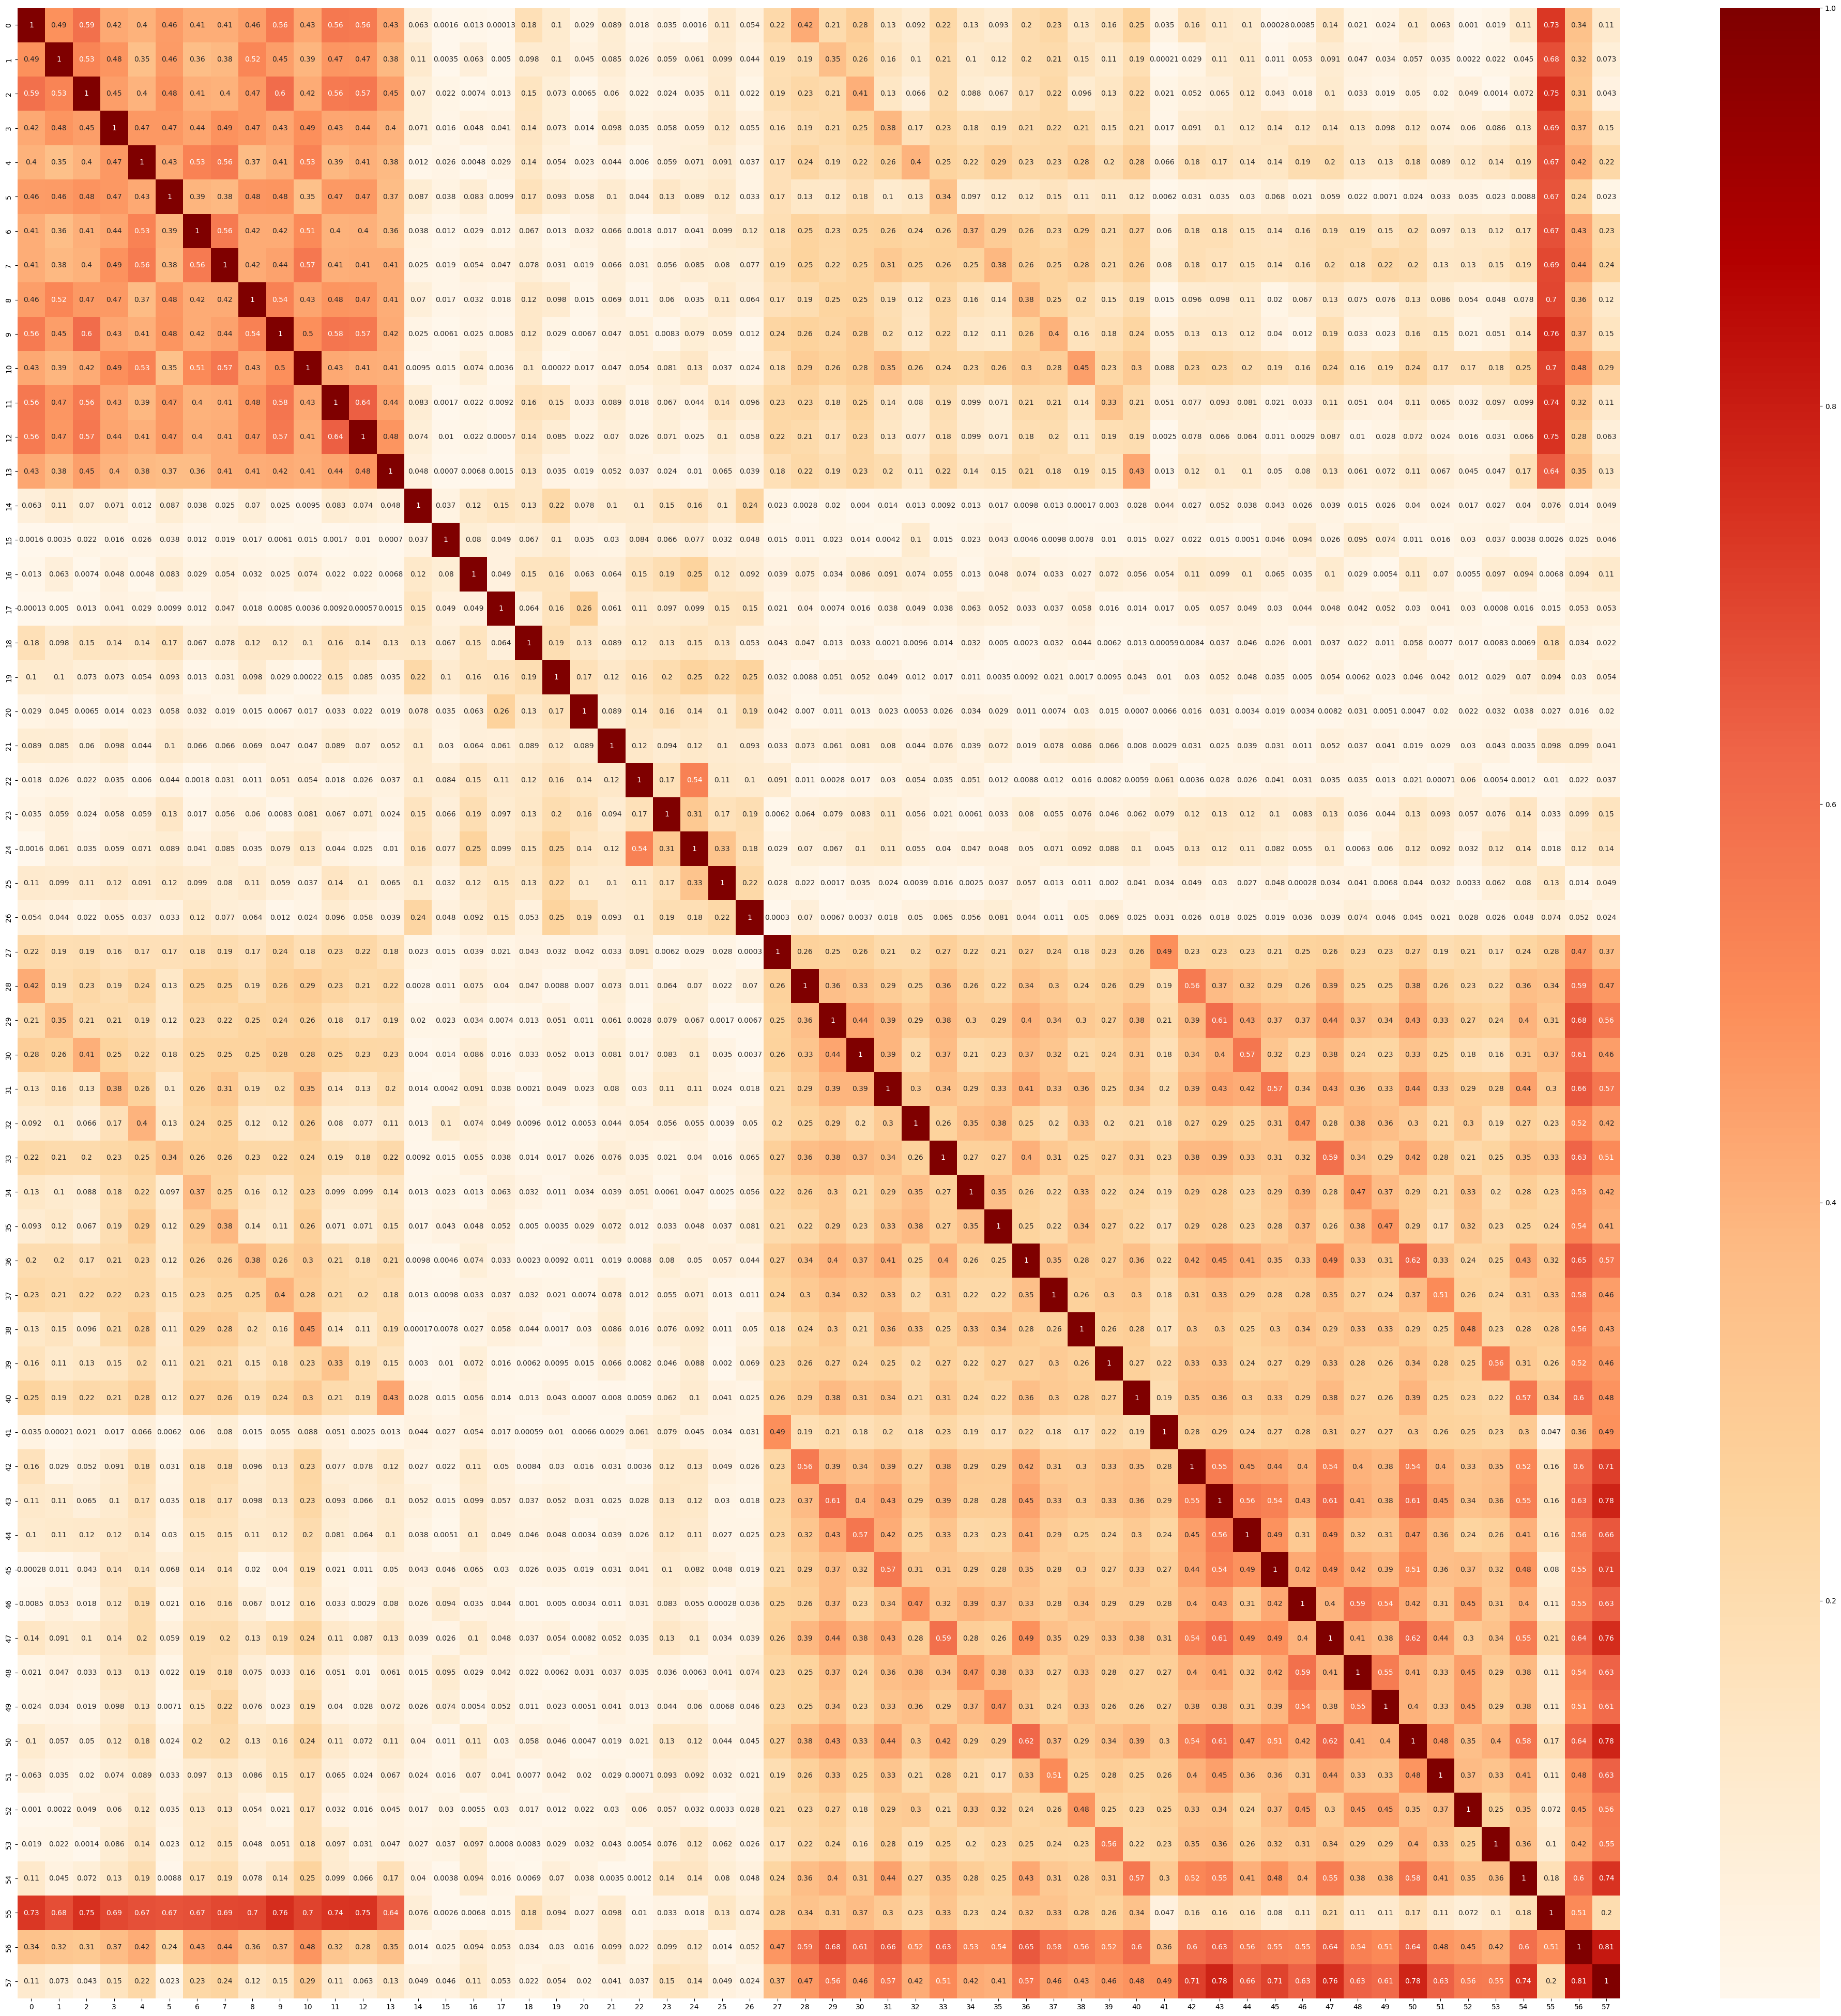

In [15]:

x_val = np.delete(x_val, [np.arange(27,40)],1)
x_test = np.delete(x_test, [np.arange(27,40)],1)
x_train = np.delete(x_train, [np.arange(27,40)],1)
df_2 = pd.DataFrame.from_records(x_train)

df_cm_2 = pd.DataFrame(df_2.corr(), index = [i for i in np.arange(0,58)], columns = [i for i in np.arange(0,58)])
plt.figure(figsize = (50,50))
sn.heatmap(abs(df_cm_2), annot = True, cmap = "OrRd")
plt.savefig("Korrelation_2")

Nun kann das Trainieren verschiedener Modelle beginnen.

Module:
1. kNN
2. Entscheidungsbäume
3. CNN

1. kNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
knn.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy}")

Genauigkeit: 0.5804195804195804


2. Entscheidungsbäume

Genauigkeit: 0.8671328671328671


Text(0, 0.5, 'Testing Accuracy')

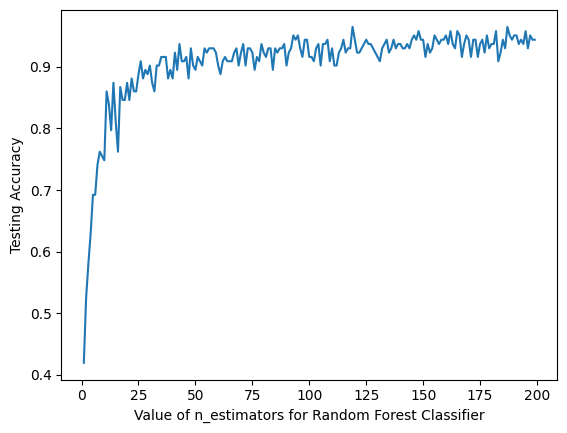

In [56]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 15)
random_forest.fit(x_train, y_train)


y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy}")


scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


3. CNN

In [3]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
keras.Input(shape = (32,32,3)),
keras.layers.Conv2D(32, (3, 3), activation = "relu", padding = "same"),
keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same"),
keras.layers.Conv2D(32,(3, 3), activation = "relu", padding = "same"),
keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same"),
keras.layers.Conv2D(32, (3, 3), activation = "relu", padding = "same"),
keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "same"),
keras.layers.Flatten(),
keras.layers.Dense(100, activation = tf.nn.relu),
keras.layers.Dense(50, activation = tf.nn.relu),
keras.layers.Dense(10, activation = "softmax")
])

ModuleNotFoundError: No module named 'distutils'